In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
# Import stats from scipy library
from scipy import stats
import statsmodels.api as sm


from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector

In [4]:
!pipreqs ../src/

INFO: Successfully saved requirements file in ../src/requirements.txt


In [94]:
flights_fe = pd.read_csv(r"./train_data_Akhmet.csv")

In [95]:
flights_fe.head()

,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,arr_delay,crs_elapsed_time,distance,inbound_flights,weather_data,arr_flights,dep_flights,arr_month,arr_day_of_week,arr_hour,dep_month,dep_day_of_week,dep_hour,service_level_or,hub_type_or,ownership_status_or,facility_use_or,area_or,fss_on_airport_or,beacon_color_or,total_operations_annual_or,Rank_or,service_level_des,hub_type_des,ownership_status_des,facility_use_des,area_des,fss_on_airport_des,beacon_color_des,total_operations_annual_des,Rank_des,origin_state,dest_state
0,DL,9E,5187,-17.0,125.0,692.0,4,Rain,0,0,1,3,23,1,3,21,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,143.0,GA,PA
1,DL,9E,5443,-18.0,124.0,692.0,3,Fog,0,11,3,0,17,3,0,15,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,143.0,GA,PA
2,DL,9E,5454,4.0,120.0,692.0,11,Precipitation,0,1,4,4,12,4,4,10,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,143.0,GA,PA
3,DL,9E,5172,-15.0,123.0,692.0,7,Rain,0,4,10,2,12,10,2,10,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,143.0,GA,PA
4,DL,9E,5172,-16.0,123.0,692.0,4,Fog,0,7,11,0,12,11,0,10,Primary,Large,PUBLIC,PUBLIC,4700.0,NO,Clear and Green,525305,1.0,Primary,Non-Hub,PUBLIC,PUBLIC,2278.0,NO,Clear and Green,87505,143.0,GA,PA


In [96]:
flights_fe.columns

Index(['mkt_unique_carrier', 'op_unique_carrier', 'op_carrier_fl_num',
       'arr_delay', 'crs_elapsed_time', 'distance', 'inbound_flights',
       'weather_data', 'arr_flights', 'dep_flights', 'arr_month',
       'arr_day_of_week', 'arr_hour', 'dep_month', 'dep_day_of_week',
       'dep_hour', 'service_level_or', 'hub_type_or', 'ownership_status_or',
       'facility_use_or', 'area_or', 'fss_on_airport_or', 'beacon_color_or',
       'total_operations_annual_or', 'Rank_or', 'service_level_des',
       'hub_type_des', 'ownership_status_des', 'facility_use_des', 'area_des',
       'fss_on_airport_des', 'beacon_color_des', 'total_operations_annual_des',
       'Rank_des', 'origin_state', 'dest_state'],
      dtype='object')

## Target variable

<AxesSubplot:ylabel='arr_delay'>

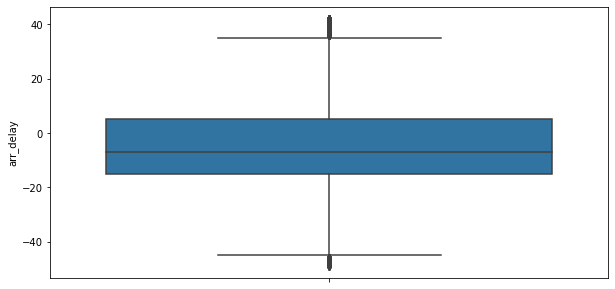

In [97]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(y=flights_fe.arr_delay)

In [98]:
100*flights_fe.arr_delay.isna().sum()/flights_fe.shape[0]

0.0

In [99]:
# drop outliers
flights_fe = flights_fe[~flights_fe.arr_delay.isna()]
flights_fe.arr_delay.isna().sum()/flights_fe.shape[0]

0.0

In [100]:
# Interquartile range (IQR)
IQR = stats.iqr(flights_fe.arr_delay, interpolation = 'midpoint')

# First quartile (Q1)
Q1 = np.percentile(flights_fe.arr_delay, 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(flights_fe.arr_delay, 75, interpolation = 'midpoint')
  
print(IQR)

20.0


In [101]:
flights_fe = flights_fe[(flights_fe.arr_delay<(Q3 + 1.5*IQR)) & (flights_fe.arr_delay>(Q1 - 1.5*IQR))]

D:\Anaconda\envs\geo_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


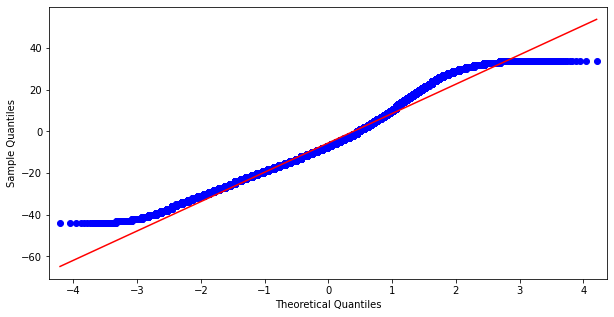

In [102]:
sm.qqplot(data=flights_fe.arr_delay,line='q')
plt.show()

<AxesSubplot:ylabel='arr_delay'>

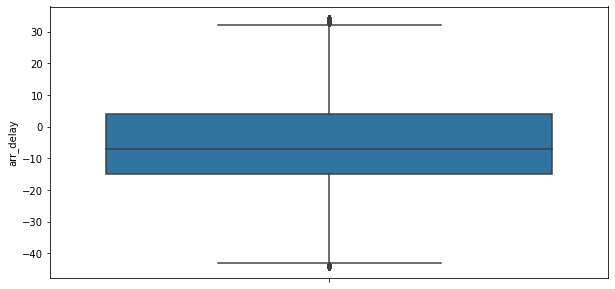

In [103]:
sns.boxplot(y=flights_fe.arr_delay)

In [104]:
flights_fe.shape

(77890, 36)

In [105]:
df = flights_fe.copy()

In [126]:
X,y= df.drop(columns=["arr_delay"]),df[["arr_delay"]]

X_dummy = X.drop(columns=["op_carrier_fl_num",'beacon_color_or','beacon_color_des','ownership_status_des','facility_use_des','ownership_status_or','facility_use_or'])

In [127]:
X_dummy.head(

,mkt_unique_carrier,op_unique_carrier,crs_elapsed_time,distance,inbound_flights,weather_data,arr_flights,dep_flights,arr_month,arr_day_of_week,arr_hour,dep_month,dep_day_of_week,dep_hour,service_level_or,hub_type_or,area_or,fss_on_airport_or,total_operations_annual_or,Rank_or,service_level_des,hub_type_des,area_des,fss_on_airport_des,total_operations_annual_des,Rank_des,origin_state,dest_state
0,DL,9E,125.0,692.0,4,Rain,0,0,1,3,23,1,3,21,Primary,Large,4700.0,NO,525305,1.0,Primary,Non-Hub,2278.0,NO,87505,143.0,GA,PA
1,DL,9E,124.0,692.0,3,Fog,0,11,3,0,17,3,0,15,Primary,Large,4700.0,NO,525305,1.0,Primary,Non-Hub,2278.0,NO,87505,143.0,GA,PA
2,DL,9E,120.0,692.0,11,Precipitation,0,1,4,4,12,4,4,10,Primary,Large,4700.0,NO,525305,1.0,Primary,Non-Hub,2278.0,NO,87505,143.0,GA,PA
3,DL,9E,123.0,692.0,7,Rain,0,4,10,2,12,10,2,10,Primary,Large,4700.0,NO,525305,1.0,Primary,Non-Hub,2278.0,NO,87505,143.0,GA,PA
4,DL,9E,123.0,692.0,4,Fog,0,7,11,0,12,11,0,10,Primary,Large,4700.0,NO,525305,1.0,Primary,Non-Hub,2278.0,NO,87505,143.0,GA,PA


In [128]:
X_dummy = pd.get_dummies(
    data=X_dummy,columns=["mkt_unique_carrier","op_unique_carrier",
                          'arr_month','arr_day_of_week','arr_hour','dep_month','dep_day_of_week','dep_hour', 
                          
                          'service_level_or','hub_type_or','fss_on_airport_or',
                          'service_level_des', 
                          'hub_type_des','fss_on_airport_des'  
                          
                          ,'origin_state','dest_state',
                        "weather_data"
                          ])

In [129]:
X_dummy.shape

(77890, 250)

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X_dummy,y,train_size=0.7,random_state=0)

In [109]:
clf =LinearRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [111]:
r2_score(y_test,y_pred)

0.0628608507966989

In [112]:
mean_absolute_error(y_test,y_pred)

11.41465541612471

In [113]:
mean_squared_error(y_test,y_pred)

207.14403831896587

In [114]:
pd.set_option('display.max_columns',None)
X_train

,crs_elapsed_time,distance,inbound_flights,arr_flights,dep_flights,area_or,total_operations_annual_or,Rank_or,area_des,total_operations_annual_des,Rank_des,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_WN,op_unique_carrier_9E,op_unique_carrier_AA,op_unique_carrier_AS,op_unique_carrier_AX,op_unique_carrier_B6,op_unique_carrier_C5,op_unique_carrier_CP,op_unique_carrier_DL,op_unique_carrier_EV,op_unique_carrier_F9,op_unique_carrier_G4,op_unique_carrier_G7,op_unique_carrier_HA,op_unique_carrier_MQ,op_unique_carrier_NK,op_unique_carrier_OH,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,arr_month_1,arr_month_2,arr_month_3,arr_month_4,arr_month_5,arr_month_6,arr_month_7,arr_month_8,arr_month_9,arr_month_10,arr_month_11,arr_month_12,arr_day_of_week_0,arr_day_of_week_1,arr_day_of_week_2,arr_day_of_week_3,arr_day_of_week_4,arr_day_of_week_5,arr_day_of_week_6,arr_hour_0,arr_hour_1,arr_hour_2,arr_hour_3,arr_hour_4,arr_hour_5,arr_hour_6,arr_hour_7,arr_hour_8,arr_hour_9,arr_hour_10,arr_hour_11,arr_hour_12,arr_hour_13,arr_hour_14,arr_hour_15,arr_hour_16,arr_hour_17,arr_hour_18,arr_hour_19,arr_hour_20,arr_hour_21,arr_hour_22,arr_hour_23,dep_month_1,dep_month_2,dep_month_3,dep_month_4,dep_month_5,dep_month_6,dep_month_7,dep_month_8,dep_month_9,dep_month_10,dep_month_11,dep_month_12,dep_day_of_week_0,dep_day_of_week_1,dep_day_of_week_2,dep_day_of_week_3,dep_day_of_week_4,dep_day_of_week_5,dep_day_of_week_6,dep_hour_0,dep_hour_1,dep_hour_2,dep_hour_5,dep_hour_6,dep_hour_7,dep_hour_8,dep_hour_9,dep_hour_10,dep_hour_11,dep_hour_12,dep_hour_13,dep_hour_14,dep_hour_15,dep_hour_16,dep_hour_17,dep_hour_18,dep_hour_19,dep_hour_20,dep_hour_21,dep_hour_22,dep_hour_23,service_level_or_Primary,hub_type_or_Large,hub_type_or_Medium,hub_type_or_Non-Hub,hub_type_or_Small,fss_on_airport_or_NO,fss_on_airport_or_YES,service_level_des_Primary,hub_type_des_Large,hub_type_des_Medium,hub_type_des_Non-Hub,hub_type_des_Small,fss_on_airport_des_NO,fss_on_airport_des_YES,origin_state_AK,origin_state_AL,origin_state_AR,origin_state_AZ,origin_state_CA,origin_state_CO,origin_state_CT,origin_state_DC,origin_state_FL,origin_state_GA,origin_state_IA,origin_state_ID,origin_state_IL,origin_state_IN,origin_state_KS,origin_state_KY,origin_state_LA,origin_state_MA,origin_state_MD,origin_state_ME,origin_state_MI,origin_state_MN,origin_state_MO,origin_state_MS,origin_state_MT,origin_state_NC,origin_state_ND,origin_state_NE,origin_state_NH,origin_state_NJ,origin_state_NM,origin_state_NV,origin_state_NY,origin_state_OH,origin_state_OK,origin_state_OR,origin_state_PA,origin_state_SC,origin_state_SD,origin_state_TN,origin_state_TX,origin_state_UT,origin_state_VA,origin_state_VT,origin_state_WA,origin_state_WI,origin_state_WV,origin_state_WY,dest_state_AK,dest_state_AL,dest_state_AR,dest_state_AZ,dest_state_CA,dest_state_CO,dest_state_CT,dest_state_DC,dest_state_FL,dest_state_GA,dest_state_HI,dest_state_IA,dest_state_ID,dest_state_IL,dest_state_IN,dest_state_KS,dest_state_KY,dest_state_LA,dest_state_MA,dest_state_MD,dest_state_ME,dest_state_MI,dest_state_MN,dest_state_MO,dest_state_MS,dest_state_MT,dest_state_NC,dest_state_ND,dest_state_NE,dest_state_NH,dest_state_NJ,dest_state_NM,dest_state_NV,dest_state_NY,dest_state_OH,dest_state_OK,dest_state_OR,dest_state_PA,dest_state_PR,dest_state_RI,dest_state_SC,dest_state_SD,dest_state_TN,dest_state_TX,dest_state_UT,dest_state_VA,dest_state_VI,dest_state_VT,dest_state_WA,dest_state_WI,dest_state_WV,dest_state_WY,weather_data_Cold,weather_data_Fog,weather_data_Hail,weather_data_Precipitation,weather_data_Rain,weather_data_Snow,weather_data_Storm
15896,100.0,530.0,0,0,0,1211.0,94079,86.0,3300.0,416422,11.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [115]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 0.3, n_estimators = 1000)
xg_reg.fit(X_train,y_train)

In [123]:
y_pred = xg_reg.predict(X_test)
r2_score(y_test,y_pred)

0.07102723787213017

In [67]:
len(X_train.columns) == len(set(X_train.columns))

False

In [77]:
x = np.unique(X_train.columns,return_counts=True)
list(zip(x[0],x[1]))

[('Rank_des', 1),
 ('Rank_or', 1),
 ('area_des', 1),
 ('area_or', 1),
 ('arr_day_of_week_0', 1),
 ('arr_day_of_week_1', 1),
 ('arr_day_of_week_2', 1),
 ('arr_day_of_week_3', 1),
 ('arr_day_of_week_4', 1),
 ('arr_day_of_week_5', 1),
 ('arr_day_of_week_6', 1),
 ('arr_flights', 1),
 ('arr_hour_0', 1),
 ('arr_hour_1', 1),
 ('arr_hour_10', 1),
 ('arr_hour_11', 1),
 ('arr_hour_12', 1),
 ('arr_hour_13', 1),
 ('arr_hour_14', 1),
 ('arr_hour_15', 1),
 ('arr_hour_16', 1),
 ('arr_hour_17', 1),
 ('arr_hour_18', 1),
 ('arr_hour_19', 1),
 ('arr_hour_2', 1),
 ('arr_hour_20', 1),
 ('arr_hour_21', 1),
 ('arr_hour_22', 1),
 ('arr_hour_23', 1),
 ('arr_hour_3', 1),
 ('arr_hour_4', 1),
 ('arr_hour_5', 1),
 ('arr_hour_6', 1),
 ('arr_hour_7', 1),
 ('arr_hour_8', 1),
 ('arr_hour_9', 1),
 ('arr_month_1', 1),
 ('arr_month_10', 1),
 ('arr_month_11', 1),
 ('arr_month_12', 1),
 ('arr_month_2', 1),
 ('arr_month_3', 1),
 ('arr_month_4', 1),
 ('arr_month_5', 1),
 ('arr_month_6', 1),
 ('arr_month_7', 1),
 ('arr_month_

## Missing values

In [16]:
(flights_fe.isna().sum()).sort_values(ascending=False).head(15)

mkt_unique_carrier             0
op_unique_carrier              0
area_or                        0
fss_on_airport_or              0
beacon_color_or                0
total_operations_annual_or     0
Rank_or                        0
service_level_des              0
hub_type_des                   0
ownership_status_des           0
facility_use_des               0
area_des                       0
fss_on_airport_des             0
beacon_color_des               0
total_operations_annual_des    0
dtype: int64

In [17]:
# drop_columns = (flights_fe.isna().sum()).sort_values(ascending=False).head(10).index.values

In [17]:
# flights_fe = flights_fe.drop(columns=drop_columns)

In [18]:
# (flights_fe.isna().sum()).sort_values(ascending=False).head(10)

dep_severity          3936
dep_type              3936
arr_severity          3859
arr_type              3859
area_or                163
area_des               159
hub_type_or             42
hub_type_des            28
Locid                   27
CY 19 Enplanements      27
dtype: int64

<AxesSubplot:xlabel='dep_severity', ylabel='count'>

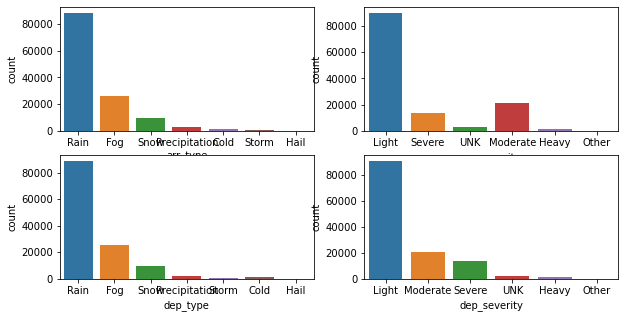

In [19]:
# fig,axs = plt.subplots(2,2)
# sns.countplot(x=flights_fe.arr_type,ax=axs[0][0])
# sns.countplot(x=flights_fe.arr_severity,ax=axs[0][1])
# sns.countplot(x=flights_fe.dep_type,ax=axs[1][0])
# sns.countplot(x=flights_fe.dep_severity,ax=axs[1][1])

In [20]:
# flights_fe.arr_type = flights_fe.arr_type.fillna(flights_fe.arr_type.describe().top)
# flights_fe.arr_severity = flights_fe.arr_severity.fillna(flights_fe.arr_severity.describe().top)
# flights_fe.dep_type = flights_fe.dep_type.fillna(flights_fe.dep_type.describe().top)
# flights_fe.dep_severity = flights_fe.dep_severity.fillna(flights_fe.dep_severity.describe().top)

In [21]:
(flights_fe.isna().sum()).sort_values(ascending=False).head(10)

area_or               163
area_des              159
hub_type_or            42
hub_type_des           28
Rank_or                27
Locid                  27
CY 19 Enplanements     27
beacon_color_or        26
beacon_color_des       20
Rank_des               20
dtype: int64

In [22]:
flights_fe.dest[flights_fe.area_des.isna()].unique()

array(['GRK', 'SIT', 'ADQ', 'OME', 'DUT', 'BRW', 'PSG', 'YAK', 'WRG'],
      dtype=object)

In [23]:
flights_fe.origin[flights_fe.area_or.isna()].unique()

array(['GRK', 'SIT', 'ADQ', 'BRW', 'OME', 'ADK', 'DUT', 'PSG', 'YAK',
       'WRG'], dtype=object)

In [24]:
flights_fe.dest[flights_fe.hub_type_des.isna()].unique()

array(['JHM', 'DVL'], dtype=object)

In [25]:
flights_fe = flights_fe.dropna()
flights_fe.shape

(132286, 79)

## Preprocessing

In [18]:
flights_dropped = flights_fe.copy()

In [19]:
flights_fe.columns

Index(['mkt_unique_carrier', 'op_unique_carrier', 'op_carrier_fl_num',
       'arr_delay', 'crs_elapsed_time', 'distance', 'inbound_flights',
       'weather_data', 'arr_flights', 'dep_flights', 'arr_month',
       'arr_day_of_week', 'arr_hour', 'dep_month', 'dep_day_of_week',
       'dep_hour', 'service_level_or', 'hub_type_or', 'ownership_status_or',
       'facility_use_or', 'area_or', 'fss_on_airport_or', 'beacon_color_or',
       'total_operations_annual_or', 'Rank_or', 'service_level_des',
       'hub_type_des', 'ownership_status_des', 'facility_use_des', 'area_des',
       'fss_on_airport_des', 'beacon_color_des', 'total_operations_annual_des',
       'Rank_des', 'origin_state', 'dest_state'],
      dtype='object')

In [20]:
test_columns = ["mkt_unique_carrier","branded_code_share",
               "mkt_carrier","mkt_carrier_fl_num",
               "op_unique_carrier","tail_num","op_carrier_fl_num",
               "origin_airport_id","origin","origin_city_name",
               "dest_airport_id","dest","dest_city_name","crs_elapsed_time",
               "flights","distance","arr_delay"]

weather_features = ['arr_type','arr_severity', 'dep_type', 'dep_severity','weather_data']

population_features = ['origin_population','dest_population']

timing_features = ['arr_date_time', 'dep_date_time', 'arr_month','arr_day_of_week', 'arr_hour','dep_month', 'dep_day_of_week', 'dep_hour']

or_airport_features = ['service_level_or','hub_type_or', 'ownership_status_or', 'facility_use_or', 'area_or',
                    'fss_on_airport_or', 'beacon_color_or', 'total_operations_annual_or','num_runways_or', 
                    'avg_runway_length_or', 'avg_runway_width_or','Rank_or','CY 19 Enplanements']

dest_airport_features = ['service_level_des', 'hub_type_des', 'ownership_status_des','facility_use_des', 'area_des', 
                         'fss_on_airport_des','beacon_color_des', 'total_operations_annual_des', 'num_runways_des',
                         'avg_runway_length_des', 'avg_runway_width_des', 'Rank_des']

from_data = ['origin_airport_type','dest_airport_type', 'inbound_flights', 
             'dep_flights_count','arr_flights_count', 'origin_state', 'dest_state']

features_to_keep = test_columns+weather_features+population_features+timing_features+or_airport_features+dest_airport_features+from_data

columns_to_drop = set(flights_dropped.columns).difference(set(features_to_keep))
flights_dropped = flights_dropped.drop(columns=columns_to_drop)

In [23]:
flights_dropped.columns

Index(['mkt_unique_carrier', 'op_unique_carrier', 'op_carrier_fl_num',
       'arr_delay', 'crs_elapsed_time', 'distance', 'inbound_flights',
       'weather_data', 'arr_month', 'arr_day_of_week', 'arr_hour', 'dep_month',
       'dep_day_of_week', 'dep_hour', 'service_level_or', 'hub_type_or',
       'ownership_status_or', 'facility_use_or', 'area_or',
       'fss_on_airport_or', 'beacon_color_or', 'total_operations_annual_or',
       'Rank_or', 'service_level_des', 'hub_type_des', 'ownership_status_des',
       'facility_use_des', 'area_des', 'fss_on_airport_des',
       'beacon_color_des', 'total_operations_annual_des', 'Rank_des',
       'origin_state', 'dest_state'],
      dtype='object')

In [21]:
repetitive_columns = ["branded_code_share","mkt_carrier","tail_num","mkt_carrier_fl_num",
                      "origin_airport_id","dest_airport_id","flights"]
flights_dropped = flights_dropped.drop(columns=repetitive_columns)

KeyError: "['branded_code_share' 'mkt_carrier' 'tail_num' 'mkt_carrier_fl_num'\n 'origin_airport_id' 'dest_airport_id' 'flights'] not found in axis"

In [22]:
flights_dropped  = flights_dropped.drop(columns=["arr_date_time","dep_date_time"])
flights_dropped.head()

KeyError: "['arr_date_time' 'dep_date_time'] not found in axis"

In [31]:
flights_dropped = flights_dropped.drop(columns=["dest_city_name","dest","origin","origin_city_name"])
flights_dropped.head()

,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,arr_delay,crs_elapsed_time,distance,arr_month,origin_airport_type,dest_airport_type,inbound_flights,...,Rank_des,arr_day_of_week,arr_hour,dep_month,dep_day_of_week,dep_hour,arr_type,arr_severity,dep_type,dep_severity
0,DL,9E,5303,-17.0,121.0,692.0,1,Very Large,Large,2,...,143.0,2,17,1,2,15,Rain,Light,Rain,Light
1,DL,9E,5454,-12.0,123.0,692.0,3,Very Large,Large,0,...,143.0,1,12,3,1,10,Rain,Light,Rain,Moderate
2,DL,9E,5443,-23.0,129.0,692.0,4,Very Large,Large,1,...,143.0,2,17,4,2,15,Rain,Light,Rain,Light
3,DL,9E,5371,5.0,123.0,692.0,5,Very Large,Large,1,...,143.0,6,12,5,6,10,Rain,Light,Rain,Light
6,DL,9E,5197,-29.0,132.0,692.0,8,Very Large,Large,1,...,143.0,0,17,8,0,15,Rain,Light,Rain,Light


In [32]:
flights_dropped.columns

Index(['mkt_unique_carrier', 'op_unique_carrier', 'op_carrier_fl_num',
       'arr_delay', 'crs_elapsed_time', 'distance', 'arr_month',
       'origin_airport_type', 'dest_airport_type', 'inbound_flights',
       'dep_flights_count', 'arr_flights_count', 'origin_state', 'dest_state',
       'origin_population', 'dest_population', 'CY 19 Enplanements',
       'service_level_or', 'hub_type_or', 'ownership_status_or',
       'facility_use_or', 'area_or', 'fss_on_airport_or', 'beacon_color_or',
       'total_operations_annual_or', 'num_runways_or', 'avg_runway_length_or',
       'avg_runway_width_or', 'Rank_or', 'service_level_des', 'hub_type_des',
       'ownership_status_des', 'facility_use_des', 'area_des',
       'fss_on_airport_des', 'beacon_color_des', 'total_operations_annual_des',
       'num_runways_des', 'avg_runway_length_des', 'avg_runway_width_des',
       'Rank_des', 'arr_day_of_week', 'arr_hour', 'dep_month',
       'dep_day_of_week', 'dep_hour', 'arr_type', 'arr_severity', 

(array([   90.,   626.,  2636.,  5357., 13393., 26363., 33369., 32091.,
        16837.,  1524.]),
 array([1.31199423, 1.39522424, 1.47845424, 1.56168424, 1.64491425,
        1.72814425, 1.81137425, 1.89460426, 1.97783426, 2.06106426,
        2.14429426]),
 <BarContainer object of 10 artists>)

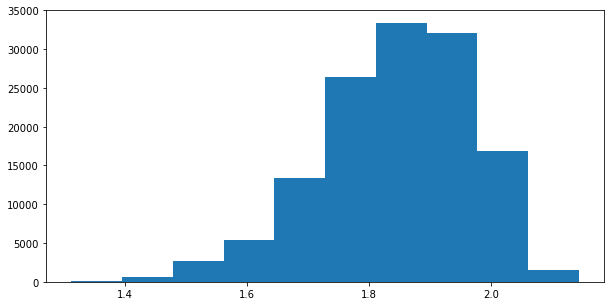

In [156]:
flights_dropped.distance = np.log(flights_dropped.distance)
plt.hist(flights_dropped.distance)

## Modelling

In [291]:
flights_modelling = flights_dropped.copy()

In [292]:
flights_modelling = flights_modelling.convert_dtypes()

In [293]:
X,y = flights_modelling.drop(columns=["arr_delay"]), flights_modelling["arr_delay"]

In [294]:
X.head()

,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,crs_elapsed_time,distance,arr_month,origin_airport_type,dest_airport_type,inbound_flights,dep_flights_count,arr_flights_count,origin_state,dest_state,origin_population,dest_population,CY 19 Enplanements,service_level_or,hub_type_or,ownership_status_or,facility_use_or,area_or,fss_on_airport_or,beacon_color_or,total_operations_annual_or,num_runways_or,avg_runway_length_or,avg_runway_width_or,Rank_or,service_level_des,hub_type_des,ownership_status_des,facility_use_des,area_des,fss_on_airport_des,beacon_color_des,total_operations_annual_des,num_runways_des,avg_runway_length_des,avg_runway_width_des,Rank_des,arr_day_of_week,arr_hour,dep_month,dep_day_of_week,dep_hour,arr_type,arr_severity,dep_type,dep_severity
0,DL,9E,5303,121,1.877874,1,Very Large,Large,2,1,0,GA,PA,21234846,21234846,53505795,Primary,Large,PUBLIC,PUBLIC,4700,NO,Clear and Green,525305,5,9877.8,150.0,1,Primary,Non-Hub,PUBLIC,PUBLIC,2278,NO,Clear and Green,87505,2,6699.5,150.0,143,2,17,1,2,15,Rain,Light,Rain,Light
1,DL,9E,5454,123,1.877874,3,Very Large,Large,0,0,0,GA,PA,21234846,21234846,53505795,Primary,Large,PUBLIC,PUBLIC,4700,NO,Clear and Green,525305,5,9877.8,150.0,1,Primary,Non-Hub,PUBLIC,PUBLIC,2278,NO,Clear and Green,87505,2,6699.5,150.0,143,1,12,3,1,10,Rain,Light,Rain,Moderate
2,DL,9E,5443,129,1.877874,4,Very Large,Large,1,1,0,GA,PA,21234846,21234846,53505795,Primary,Large,PUBLIC,PUBLIC,4700,NO,Clear and Green,525305,5,9877.8,150.0,1,Primary,Non-Hub,PUBLIC,PUBLIC,2278,NO,Clear and Green,87505,2,6699.5,150.0,143,2,17,4,2,15,Rain,Light,Rain,Light
3,DL,9E,5371,123,1.877874,5,Very Large,Large,1,1,0,GA,PA,21234846,21234846,53505795,Primary,Large,PUBLIC,PUBLIC,4700,NO,Clear and Green,525305,5,9877.8,150.0,1,Primary,Non-Hub,PUBLIC,PUBLIC,2278,NO,Clear and Green,87505,2,6699.5,150.0,143,6,12,5,6,10,Rain,Light,Rain,Light
6,DL,9E,5197,132,1.877874,8,Very Large,Large,1,4,0,GA,PA,21234846,21234846,53505795,Primary,Large,PUBLIC,PUBLIC,4700,NO,Clear and Green,525305,5,9877.8,150.0,1,Primary,Non-Hub,PUBLIC,PUBLIC,2278,NO,Clear and Green,87505,2,6699.5,150.0,143,0,17,8,0,15,Rain,Light,Rain,Light


In [295]:
X.shape

(132286, 49)

## Polynomial features

In [296]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [297]:
# original version had class ColumnExtractor(object)
# estimators need to inherit from these classes to play nicely with others
class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_cols = X[self.columns]
        return X_cols

In [298]:
poly = PolynomialFeatures()

In [299]:
cols_to_poly = ["distance","inbound_flights"]
remaining_columns = [col for col in X.columns if col not in cols_to_poly]

In [300]:
# Using pandas get dummies to make pipeline a bit simpler by
# avoiding one-hot and label encoder.     
# Build the pipeline from a FeatureUnion that processes 
# numerical and one-hot encoded separately.
# FeatureUnion puts them back together when it's done.
pipe2nvars = Pipeline([
    ('features', FeatureUnion([('num', 
                                Pipeline([('extract', 
                                           ColumnExtractor(columns=cols_to_poly)),
                                          ('poly', 
                                           poly)  ])),
                               ('cat_var', 
                                ColumnExtractor(columns=remaining_columns))])
    )])   

In [301]:
pipe2nvars.set_params(features__num__poly__degree=2)
X = pd.DataFrame(pipe2nvars.fit_transform(X))

In [302]:
cols = poly.get_feature_names(input_features=cols_to_poly)+remaining_columns
cols = dict(zip(range(X.shape[1]),cols))
X = X.rename(columns=cols)

In [303]:
X.head()

,1,distance,inbound_flights,distance^2,distance inbound_flights,inbound_flights^2,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,crs_elapsed_time,arr_month,origin_airport_type,dest_airport_type,dep_flights_count,arr_flights_count,origin_state,dest_state,origin_population,dest_population,CY 19 Enplanements,service_level_or,hub_type_or,ownership_status_or,facility_use_or,area_or,fss_on_airport_or,beacon_color_or,total_operations_annual_or,num_runways_or,avg_runway_length_or,avg_runway_width_or,Rank_or,service_level_des,hub_type_des,ownership_status_des,facility_use_des,area_des,fss_on_airport_des,beacon_color_des,total_operations_annual_des,num_runways_des,avg_runway_length_des,avg_runway_width_des,Rank_des,arr_day_of_week,arr_hour,dep_month,dep_day_of_week,dep_hour,arr_type,arr_severity,dep_type,dep_severity
0,1.0,1.877874,2.0,3.52641,3.755748,4.0,DL,9E,5303,121,1,Very Large,Large,1,0,GA,PA,21234846,21234846,53505795,Primary,Large,PUBLIC,PUBLIC,4700,NO,Clear and Green,525305,5,9877.8,150.0,1,Primary,Non-Hub,PUBLIC,PUBLIC,2278,NO,Clear and Green,87505,2,6699.5,150.0,143,2,17,1,2,15,Rain,Light,Rain,Light
1,1.0,1.877874,0.0,3.52641,0.0,0.0,DL,9E,5454,123,3,Very Large,Large,0,0,GA,PA,21234846,21234846,53505795,Primary,Large,PUBLIC,PUBLIC,4700,NO,Clear and Green,525305,5,9877.8,150.0,1,Primary,Non-Hub,PUBLIC,PUBLIC,2278,NO,Clear and Green,87505,2,6699.5,150.0,143,1,12,3,1,10,Rain,Light,Rain,Moderate
2,1.0,1.877874,1.0,3.52641,1.877874,1.0,DL,9E,5443,129,4,Very Large,Large,1,0,GA,PA,21234846,21234846,53505795,Primary,Large,PUBLIC,PUBLIC,4700,NO,Clear and Green,525305,5,9877.8,150.0,1,Primary,Non-Hub,PUBLIC,PUBLIC,2278,NO,Clear and Green,87505,2,6699.5,150.0,143,2,17,4,2,15,Rain,Light,Rain,Light
3,1.0,1.877874,1.0,3.52641,1.877874,1.0,DL,9E,5371,123,5,Very Large,Large,1,0,GA,PA,21234846,21234846,53505795,Primary,Large,PUBLIC,PUBLIC,4700,NO,Clear and Green,525305,5,9877.8,150.0,1,Primary,Non-Hub,PUBLIC,PUBLIC,2278,NO,Clear and Green,87505,2,6699.5,150.0,143,6,12,5,6,10,Rain,Light,Rain,Light
4,1.0,1.877874,1.0,3.52641,1.877874,1.0,DL,9E,5197,132,8,Very Large,Large,4,0,GA,PA,21234846,21234846,53505795,Primary,Large,PUBLIC,PUBLIC,4700,NO,Clear and Green,525305,5,9877.8,150.0,1,Primary,Non-Hub,PUBLIC,PUBLIC,2278,NO,Clear and Green,87505,2,6699.5,150.0,143,0,17,8,0,15,Rain,Light,Rain,Light


## One hot encoding

In [321]:
X_dummy = X.drop(columns=["op_carrier_fl_num","crs_elapsed_time",
                          'origin_airport_type','dest_airport_type',
                          "num_runways_des","num_runways_or",
                          "avg_runway_length_or","avg_runway_width_or",
                          "avg_runway_length_des","avg_runway_width_des"
                         ])

In [322]:
X_dummy = pd.get_dummies(
    data=X_dummy,columns=["mkt_unique_carrier","op_unique_carrier"])

X_dummy = pd.get_dummies(
    data=X_dummy,columns=['arr_month','arr_day_of_week', 'arr_hour',
                          'dep_month', 'dep_day_of_week', 'dep_hour',])

X_dummy = pd.get_dummies(
    data=X_dummy,columns=['service_level_or','hub_type_or', 'ownership_status_or', 'facility_use_or','fss_on_airport_or','beacon_color_or',])

X_dummy = pd.get_dummies(
    data=X_dummy,columns=['hub_type_des', 'ownership_status_des','facility_use_des', 'fss_on_airport_des','beacon_color_des','service_level_des',])

X_dummy = pd.get_dummies(
    data=X_dummy,columns=['origin_state', 'dest_state',])

X_dummy = pd.get_dummies(
    data=X_dummy,columns=['arr_type','arr_severity', 'dep_type', 'dep_severity'])      

X_dummy.shape

(132286, 294)

In [323]:
X_dummy.columns

Index(['1', 'distance', 'inbound_flights', 'distance^2',
       'distance inbound_flights', 'inbound_flights^2', 'dep_flights_count',
       'arr_flights_count', 'origin_population', 'dest_population',
       ...
       'dep_type_Precipitation', 'dep_type_Rain', 'dep_type_Snow',
       'dep_type_Storm', 'dep_severity_Heavy', 'dep_severity_Light',
       'dep_severity_Moderate', 'dep_severity_Other', 'dep_severity_Severe',
       'dep_severity_UNK'],
      dtype='object', length=294)

In [324]:
pd.set_option('display.max_columns', None)
X_dummy.head()

,1,distance,inbound_flights,distance^2,distance inbound_flights,inbound_flights^2,dep_flights_count,arr_flights_count,origin_population,dest_population,CY 19 Enplanements,area_or,total_operations_annual_or,Rank_or,area_des,total_operations_annual_des,Rank_des,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_WN,op_unique_carrier_9E,op_unique_carrier_AA,op_unique_carrier_AS,op_unique_carrier_AX,op_unique_carrier_B6,op_unique_carrier_C5,op_unique_carrier_CP,op_unique_carrier_DL,op_unique_carrier_EM,op_unique_carrier_EV,op_unique_carrier_F9,op_unique_carrier_G4,op_unique_carrier_G7,op_unique_carrier_HA,op_unique_carrier_MQ,op_unique_carrier_NK,op_unique_carrier_OH,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,arr_month_1,arr_month_2,arr_month_3,arr_month_4,arr_month_5,arr_month_6,arr_month_7,arr_month_8,arr_month_9,arr_month_10,arr_month_11,arr_month_12,arr_day_of_week_0,arr_day_of_week_1,arr_day_of_week_2,arr_day_of_week_3,arr_day_of_week_4,arr_day_of_week_5,arr_day_of_week_6,arr_hour_0,arr_hour_1,arr_hour_2,arr_hour_3,arr_hour_4,arr_hour_5,arr_hour_6,arr_hour_7,arr_hour_8,arr_hour_9,arr_hour_10,arr_hour_11,arr_hour_12,arr_hour_13,arr_hour_14,arr_hour_15,arr_hour_16,arr_hour_17,arr_hour_18,arr_hour_19,arr_hour_20,arr_hour_21,arr_hour_22,arr_hour_23,dep_month_1,dep_month_2,dep_month_3,dep_month_4,dep_month_5,dep_month_6,dep_month_7,dep_month_8,dep_month_9,dep_month_10,dep_month_11,dep_month_12,dep_day_of_week_0,dep_day_of_week_1,dep_day_of_week_2,dep_day_of_week_3,dep_day_of_week_4,dep_day_of_week_5,dep_day_of_week_6,dep_hour_0,dep_hour_1,dep_hour_2,dep_hour_3,dep_hour_4,dep_hour_5,dep_hour_6,dep_hour_7,dep_hour_8,dep_hour_9,dep_hour_10,dep_hour_11,dep_hour_12,dep_hour_13,dep_hour_14,dep_hour_15,dep_hour_16,dep_hour_17,dep_hour_18,dep_hour_19,dep_hour_20,dep_hour_21,dep_hour_22,dep_hour_23,service_level_or_Primary,hub_type_or_Large,hub_type_or_Medium,hub_type_or_Non-Hub,hub_type_or_Small,ownership_status_or_AIR FORCE,ownership_status_or_NAVY,ownership_status_or_PUBLIC,facility_use_or_PUBLIC,fss_on_airport_or_NO,fss_on_airport_or_YES,beacon_color_or_Clear and Green,hub_type_des_Large,hub_type_des_Medium,hub_type_des_Non-Hub,hub_type_des_Small,ownership_status_des_AIR FORCE,ownership_status_des_NAVY,ownership_status_des_PUBLIC,facility_use_des_PUBLIC,fss_on_airport_des_NO,fss_on_airport_des_YES,beacon_color_des_Clear and Green,service_level_des_Primary,origin_state_AK,origin_state_AL,origin_state_AR,origin_state_AZ,origin_state_CA,origin_state_CO,origin_state_CT,origin_state_DC,origin_state_FL,origin_state_GA,origin_state_HI,origin_state_IA,origin_state_ID,origin_state_IL,origin_state_IN,origin_state_KS,origin_state_KY,origin_state_LA,origin_state_MA,origin_state_MD,origin_state_ME,origin_state_MI,origin_state_MN,origin_state_MO,origin_state_MS,origin_state_MT,origin_state_NC,origin_state_ND,origin_state_NE,origin_state_NH,origin_state_NJ,origin_state_NM,origin_state_NV,origin_state_NY,origin_state_OH,origin_state_OK,origin_state_OR,origin_state_PA,origin_state_PR,origin_state_RI,origin_state_SC,origin_state_SD,origin_state_TN,origin_state_TT,origin_state_TX,origin_state_UT,origin_state_VA,origin_state_VI,origin_state_VT,origin_state_WA,origin_state_WI,origin_state_WV,origin_state_WY,dest_state_AK,dest_state_AL,dest_state_AR,dest_state_AZ,dest_state_CA,dest_state_CO,dest_state_CT,dest_state_DC,dest_state_FL,dest_state_GA,dest_state_HI,dest_state_IA,dest_state_ID,dest_state_IL,dest_state_IN,dest_state_KS,dest_state_KY,dest_state_LA,dest_state_MA,dest_state_MD,dest_state_ME,dest_state_MI,dest_state_MN,dest_state_MO,dest_state_MS,dest_state_MT,dest_state_NC,dest_state_ND,dest_state_NE,dest_state_NH,dest_state_NJ,dest_state_NM,dest_state_NV,dest_state_

### Scaling features

In [325]:
# scaler= StandardScaler()
scaler = MinMaxScaler()

In [326]:
X_scaled = pd.DataFrame(scaler.fit_transform(X=X_dummy),columns=X_dummy.columns)

In [327]:
X_scaled.shape

(132286, 294)

## Feature Importance

In [328]:

#transformation
#scale features

# polynomial regression
# p-value for coefficients

#

In [329]:
X_s = X_scaled
# X_s = X_dummy

In [330]:
X_train,X_test,y_train,y_test = train_test_split(X_s,y,train_size=0.7,random_state=1234)

In [331]:
X_train.shape

(92600, 294)

In [333]:
reg = LinearRegression()
sfs = SequentialFeatureSelector(reg)
sfs.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
model = GridSearchCV(reg,param_grid={})
model.fit(X_train,y_train)

In [ ]:
sfs = 

In [316]:
y_pred = model.predict(X_test)

In [317]:
print(r2_score(y_test,y_pred))

0.03529074548514666


D:\Anaconda\envs\geo_env\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [1248]:
params = {'criterion' : ['mse'],'n_estimators':[100]}

In [1249]:
reg = RandomForestRegressor()
model = GridSearchCV(reg,param_grid=params)
model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'n_estimators': [100]})

In [1250]:
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

0.0013254389083622309


In [576]:
import xgboost as xgb

In [1262]:
#  [ {'booster':'gbtree',"verbosity":[2],'eta':uniform(0.01,0.3),"max_depth":uniform(1,6),"n_estimators":[1000]},
params =  [{'booster':['gbtree'],"verbosity":[1],'eta':[0.001,0.01,0.3],"max_depth":[4,5,6],"n_estimators":[1000,1500]}]

In [ ]:

xgb_r = xgb.XGBRegressor(objective='reg:squarederror')

random_search = GridSearchCV(xgb_r, param_grid=params,scoring='r2', verbose=3)


random_search.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END booster=gbtree, eta=0.001, max_depth=4, n_estimators=1000, verbosity=1;, score=-0.006 total time= 1.5min
[CV 2/5] END booster=gbtree, eta=0.001, max_depth=4, n_estimators=1000, verbosity=1;, score=-0.015 total time= 1.7min
[CV 3/5] END booster=gbtree, eta=0.001, max_depth=4, n_estimators=1000, verbosity=1;, score=-0.008 total time= 1.8min
[CV 4/5] END booster=gbtree, eta=0.001, max_depth=4, n_estimators=1000, verbosity=1;, score=-0.011 total time= 1.8min
[CV 5/5] END booster=gbtree, eta=0.001, max_depth=4, n_estimators=1000, verbosity=1;, score=-0.009 total time= 1.8min
[CV 1/5] END booster=gbtree, eta=0.001, max_depth=4, n_estimators=1500, verbosity=1;, score=0.012 total time= 2.9min
[CV 2/5] END booster=gbtree, eta=0.001, max_depth=4, n_estimators=1500, verbosity=1;, score=0.008 total time= 2.9min
[CV 3/5] END booster=gbtree, eta=0.001, max_depth=4, n_estimators=1500, verbosity=1;, score=0.012 total time= 3.1mi

In [ ]:
# Predict the model
pred = random_search.predict(X_test)

r2_score(y_test, pred)

In [1261]:
random_search.best_params_

{'booster': 'gbtree',
 'eta': 0.01,
 'max_depth': 6,
 'n_estimators': 1000,
 'verbosity': 2}

### selecting features by p-value

In [1218]:
gamma_model = sm.GLM(y_train.values,X_train.values)

In [1219]:
gamma_results = gamma_model.fit()

In [1256]:
cols_with_high_p_value = (pd.DataFrame(gamma_results.pvalues,index=X_dummy.columns))

In [1257]:
cols_with_high_p_value

,0
1,0.344897
distance,0.004339
inbound_flights,0.370107
num_runways_des,0.012071
num_runways_or,0.192074
...,...
dep_severity_Light,0.000152
dep_severity_Moderate,0.490857
dep_severity_Other,0.415166
dep_severity_Severe,0.117980


In [1258]:
cols_with_high_p_value['Params']=gamma_results.params

In [1260]:
cols_with_high_p_value.sort_values(by=['Params'],ascending=False)

,0,Params
origin_state_TT,9.987887e-03,16.649660
dest_state_TT,4.762740e-01,5.957161
mkt_unique_carrier_HA,1.926377e-14,5.822830
dep_hour_4,1.256461e-01,5.195439
op_unique_carrier_EM,6.541177e-05,5.067846
...,...,...
origin_state_NH,1.120762e-02,-3.372640
Rank_des,3.105322e-03,-3.973836
num_runways_des,1.207114e-02,-4.117402
origin_state_VI,2.189971e-02,-4.205782


In [1242]:
# from sklearn.feature_selection import SelectKBest,f_regression

In [1243]:
# selector = SelectKBest(f_regression, k=200)
# X_new = selector.fit_transform(X_dummy, y)

In [1244]:
# pd.DataFrame({'columns':X_dummy.columns,'scores':selector.scores_}).sort_values(by=["scores"],ascending=False).head(20)